In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pdr as pdr
import PyMieScatt as ps
import planetary
from planetary import planetRad

# Part II: Topography Analysis - Hurst Exponent Calculation

In [2]:
data1 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data1 (1).txt", delim_whitespace=True, header=None)
data2 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data2 (1).txt", delim_whitespace=True, header=None)

C:\Users\Mirie\AppData\Local\Temp\ipykernel_5124\257674426.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data1 (1).txt", delim_whitespace=True, header=None)
C:\Users\Mirie\AppData\Local\Temp\ipykernel_5124\257674426.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data2 = pd.read_csv(r"C:\Users\Mirie\Downloads\topo-data2 (1).txt", delim_whitespace=True, header=None)


In [3]:
data1.columns = ['H', 'V']
data2.columns = ['H', 'V']

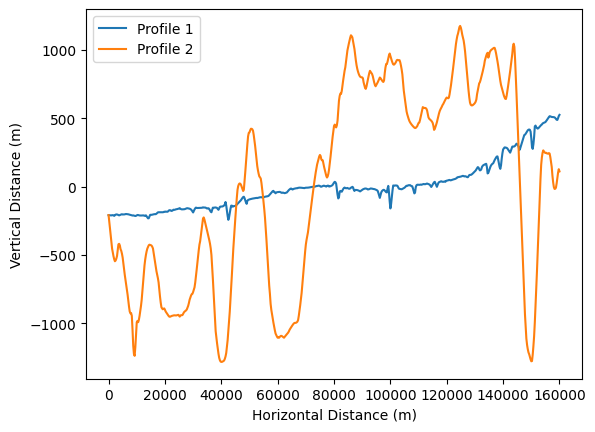

In [4]:
plt.plot(data1['H'], data1['V'], label = 'Profile 1')
plt.plot(data2['H'], data2['V'], label = 'Profile 2')
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.legend()

### 1. Find RMS slopes

In [5]:
#used microsoft copilot to help with creating this function
def calculate_rms_slope(elevations, baselines):
    rms_slopes = []
    for L in baselines:
        elevation_diffs = [elevations[i + 1] - elevations[i] for i in range((len(elevations) - 1))]
        rms_slope = np.std(elevation_diffs) / int(L)
        rms_slopes.append(rms_slope)
    return rms_slopes

In [6]:
#find slopes
#s_0 = rms slope on the first spacial scale 
#s(L) = rms slope on the larger spacial scale
L_1 = 250
L_2 = 10 * L_1
baselines = list(np.linspace(L_1,L_2,100))

In [7]:
rms_slope_1 = calculate_rms_slope(data1['V'], baselines)
rms_slope_2 = calculate_rms_slope(data2['V'], baselines)

### 2. Plot RMS slopes as a function of L

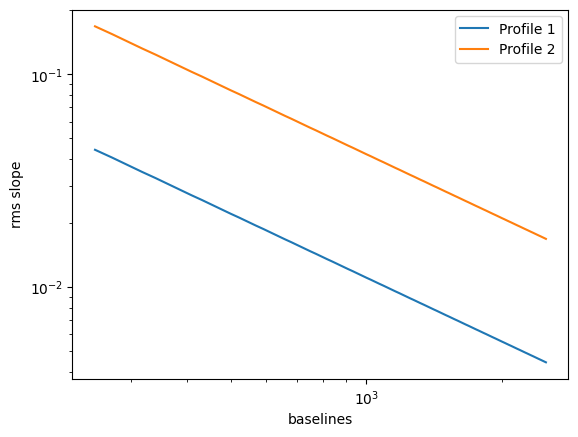

In [8]:
plt.plot(baselines, rms_slope_1, label = 'Profile 1') #color = 'blue')
plt.plot(baselines, rms_slope_2, label = 'Profile 2') #color = 'blue')
plt.ylabel('rms slope')
plt.xlabel('baselines')
plt.xscale('log')
plt.yscale('log')
plt.legend()

### 3. Determine Hurst Exponent

### 4. Identifying the profiles

# Part III: Mercury Crater Analysis using PDS Data

## Data Acquisition

In [9]:
img = pdr.read(r"C:\Users\Mirie\Downloads\MDIS_HIW_256PPD_H09NE2.IMG")
lbl = pdr.read(r"C:\Users\Mirie\Downloads\MDIS_HIW_256PPD_H09NE2.LBL")

In [10]:
np.shape(img['IMAGE'])

(6, 5760, 9216)

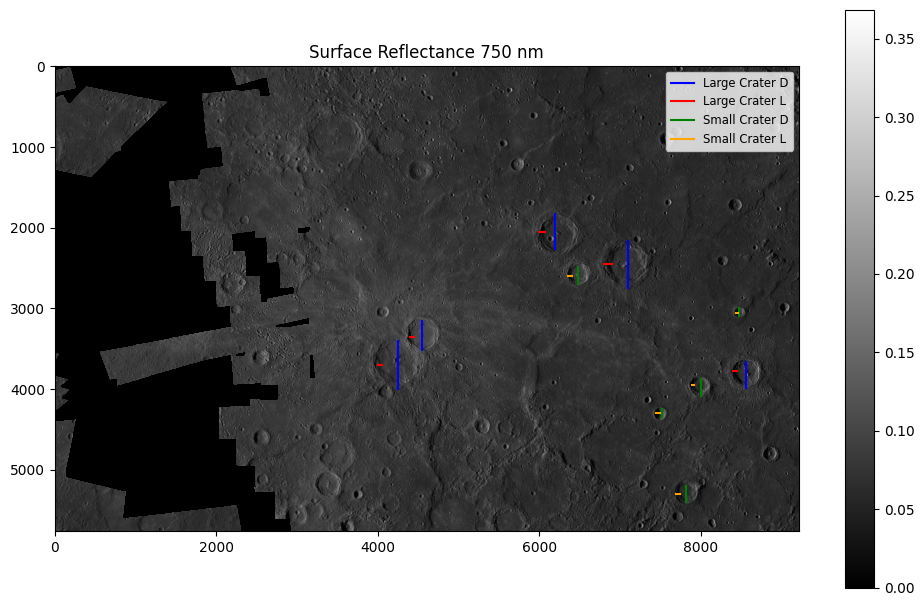

In [11]:
plt.figure(figsize = [12, 12/1.6])
plt.imshow(img['IMAGE'][0,:,:], 'gist_gray',vmin=0)
plt.colorbar()
plt.title('Surface Reflectance 750 nm')

#Crater 1
plt.axvline(4250, 1-(3400/5760), 1-(4000/5760),label = 'Large Crater D', color = 'blue')
plt.axhline(3700, 4000/9216, 4050/9216, label = 'Large Crater L', color = 'red')

#Crater 2
plt.axvline(4550, 1-(3150/5760), 1-(3510/5760), color = 'blue')
plt.axhline(3350, 4400/9216, 4450/9216,  color = 'red')

#Crater 3
plt.axvline(6200, 1-(1825/5760), 1-(2260/5760), color = 'blue')
plt.axhline(2050, 6000/9216, 6070/9216, color = 'red')

#Crater 4
plt.axvline(7100, 1-(2160/5760), 1-(2745/5760), color = 'blue')
plt.axhline(2450, 6800/9216, 6900/9216, color = 'red')

#Crater 5
plt.axvline(8560, 1-(3660/5760), 1-(3980/5760), color = 'blue')
plt.axhline(3780, 8400/9216, 8450/9216, color = 'red')

#Crater 6
plt.axvline(8000, 1-(3870/5760), 1-(4080/5760),label = 'Small Crater D', color = 'Green')
plt.axhline(3950, 7890/9216, 7920/9216, label = 'Small Crater L', color = 'orange')

#Crater 7
plt.axvline(6475, 1-(2490/5760), 1-(2700/5760), color = 'Green')
plt.axhline(2600, 6360/9216, 6400/9216, color = 'orange')

#Crater 8
plt.axvline(7820, 1-(5200/5760), 1-(5400/5760), color = 'Green')
plt.axhline(5300, 7700/9216, 7750/9216, color = 'orange')

#Crater 9
plt.axvline(7520, 1-(4240/5760), 1-(4350/5760), color = 'Green')
plt.axhline(4300, 7450/9216, 7500/9216, color = 'orange')

#Crater 10
plt.axvline(8480, 1-(2990/5760), 1-(3090/5760), color = 'Green')
plt.axhline(3050, 8440/9216, 8460/9216, color = 'orange')

plt.legend(fontsize = 'small')
plt.show()

In [12]:
lbl['LABEL']

'PDS_VERSION_ID                 = PDS3\nRECORD_TYPE                    = FIXED_LENGTH\nRECORD_BYTES                   = 36864\nFILE_RECORDS                   = 34560\n\n^IMAGE                         = "MDIS_HIW_256PPD_H09NE2.IMG"\n\n/* Map-projected Basemap RDR Identification */\n\nDATA_SET_ID                    = "MESS-H-MDIS-5-RDR-HIW-V1.0"\nPRODUCT_ID                     = "MDIS_HIW_256PPD_H09NE2"\n\nINSTRUMENT_HOST_NAME           = "MESSENGER"\nINSTRUMENT_NAME = {"MERCURY DUAL IMAGING SYSTEM NARROW ANGLE CAMERA",\n                   "MERCURY DUAL IMAGING SYSTEM WIDE ANGLE CAMERA"}\nINSTRUMENT_ID                  = {"MDIS-NAC","MDIS-WAC"}\nTARGET_NAME                    = MERCURY\nPRODUCT_TYPE                   = MAP_PROJECTED_HIW\nPRODUCT_CREATION_TIME          = 2016-12-31T06:18:00.044\nSTART_TIME                     = "N/A"\nSTOP_TIME                      = "N/A"\nSPACECRAFT_CLOCK_START_COUNT   = "N/A"\nSPACECRAFT_CLOCK_STOP_COUNT    = "N/A"\nPRODUCT_VERSION_ID             = "2"

$\textbf{Product \ ID:}$ "MDIS_HIW_256PPD_H09NE2" \
$\textbf{Acquisition \ date}$: 2016-12-31T06:18:00.044 \
$\textbf{Observation \ geometry \ (including \ incidence \ angle):}$  \
$\textbf{Spatial \ resolution \ (m/pixel)}$: 166.310788 \
$\textbf{Approximate \ location \ on \ Mercury:}$ latitude: 0 - 22.5 degrees, longitude: 108 - 144 degrees

## Shadow Measurement and Depth Calculation

#### Assuming the side of the crater can be represented by a right triangle, we can find the shadow depth using the equation: $d = L tan \theta $  where L is the shadow length and $\theta$ is the solar incidence angle 

In [13]:
def calculate_depth(L, theta):
    return (L * np.tan(theta)) 

In [14]:
pixel_scale = 166.3 #meters/pixel from the label file

# The lines I plotted on top of the craters were used to measure the approximate crater diameters and shadow lengths below
crater_diameters = (pixel_scale * 10e-3) * np.array([600, 360, 435, 585, 320, 210, 210, 200, 110, 100]) #km
crater_shadows = (pixel_scale * 10e-3)  * np.array([50, 50, 70, 100, 50, 30, 40, 50, 50, 20]) #km


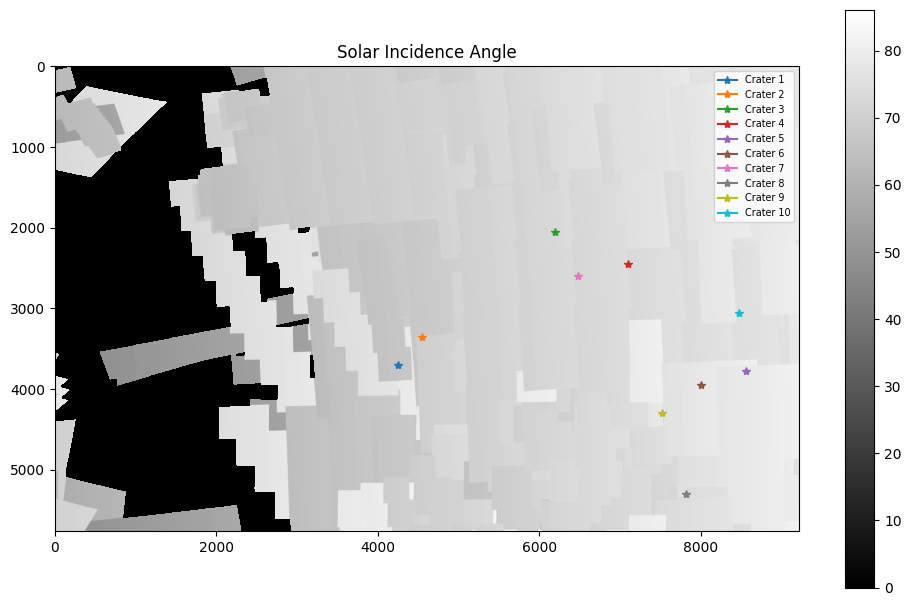

In [15]:
plt.figure(figsize = [12, 12/1.6])
plt.imshow(img['IMAGE'][3,:,:], 'gist_gray',vmin=0)
plt.colorbar()
plt.title('Solar Incidence Angle')

crater_coords = [[4250, 3700],[4550,3350],[6200, 2050], [7100,2450],[8560,3780], [8000, 3950],
                 [6475,2600], [7820,5300], [7520,4300], [8480,3050] ]
theta_arr = []
crater_num = []
for i in range(len(crater_coords)):
    plt.plot(crater_coords[i][0], crater_coords[i][1], marker = '*', label = 'Crater %s' %(i+1))
    theta_arr.append(img['IMAGE'][3,crater_coords[i][1],crater_coords[i][0]])
    crater_num.append('Crater %s' %(i+1))
plt.legend(fontsize = 'x-small')
plt.show()

In [16]:
# Calculating crater depths
crater_depths = []
for L, theta in zip(crater_shadows, theta_arr):
    theta = (theta*np.pi/180)
    d = calculate_depth(L, theta)
    crater_depths.append(d)

In [17]:
# Calculating depth-to-diameter ratio
d_D = crater_depths/crater_diameters

In [18]:
df = pd.DataFrame()

In [19]:
df['Crater Number'] = crater_num
df['Crater Diameter (km)'] = crater_diameters 
df['Crater Shadow Length (km)'] = crater_shadows
df['Crater Solar Incidence Angle (degrees)'] = theta_arr
df['Crater Depth (km)'] = crater_depths
df['Crater d/D ratio'] = d_D

In [20]:
df

,Crater Number,Crater Diameter (km),Crater Shadow Length (km),Crater Solar Incidence Angle (degrees),Crater Depth (km),Crater d/D ratio
0,Crater 1,997.800,83.15,66.655350,192.658725,0.193084
1,Crater 2,598.680,83.15,69.940834,227.720803,0.380371
2,Crater 3,723.405,116.41,73.013634,381.084255,0.526792
3,Crater 4,972.855,166.30,73.151344,549.126427,0.564448
4,Crater 5,532.160,83.15,78.508919,409.021193,0.768606
5,Crater 6,349.230,49.89,77.938499,233.481389,0.668561
6,Crater 7,349.230,66.52,72.319336,208.677822,0.597537
7,Crater 8,332.600,83.15,73.833122,286.822968,0.862366
8,Crater 9,182.930,83.15,73.826340,286.696056,1.567245
9,Crater 10,166.300,33.26,75.064209,124.686767,0.749770


## Analysis

In [21]:
mean_d_D_large = np.mean(d_D[0:4])
print('Mean d/D ratio for large craters is: %f' %mean_d_D_large)
mean_d_D_small = np.mean(d_D[5:9])
print('Mean d/D ratio for small craters is: %f' %mean_d_D_small)

std_d_D_large = np.std(d_D[0:4])
print('std of the d/D ratio for large craters is: %f' %std_d_D_large)
std_d_D_small = np.std(d_D[5:9])
print('std of the d/D ratio for small craters is: %f' %std_d_D_small)

Mean d/D ratio for large craters is: 0.416174
Mean d/D ratio for small craters is: 0.923927
std of the d/D ratio for large craters is: 0.146008
std of the d/D ratio for small craters is: 0.383859


# Part IV: Spectroscopy - Mie Scattering Analysis

## Optical Constants

In [27]:
spectra_ch4 = pd.read_csv(r"C:\Users\Mirie\Downloads\CH4-Amorphous-10K.txt", delim_whitespace=True, header=None)
spectra_ch4.columns = [ 'wavelength(nm)', 'Transmission' , 'n'  , 'k']

wavelength = np.array(spectra_ch4['wavelength(nm)'])
transmission = np.array(spectra_ch4['Transmission'])
n_arr = np.array(spectra_ch4['n'])
k_arr = np.array(spectra_ch4['k'])

C:\Users\Mirie\AppData\Local\Temp\ipykernel_5124\419012752.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  spectra_ch4 = pd.read_csv(r"C:\Users\Mirie\Downloads\CH4-Amorphous-10K.txt", delim_whitespace=True, header=None)


In [28]:
spectra_ch4

,wavelength(nm),Transmission,n,k
0,399.98999,0.990508,1.337587,0.032845
1,400.08999,0.991263,1.337587,0.030416
2,400.18999,0.991659,1.340041,0.028832
3,400.28999,0.991410,1.335972,0.029694
4,400.38999,0.990378,1.338063,0.033255
...,...,...,...,...
45996,4999.60000,0.999921,1.278251,0.000075
45997,4999.70000,0.999816,1.278234,0.000107
45998,4999.80000,0.999756,1.278185,0.000127
45999,4999.90000,0.999759,1.278157,0.000127


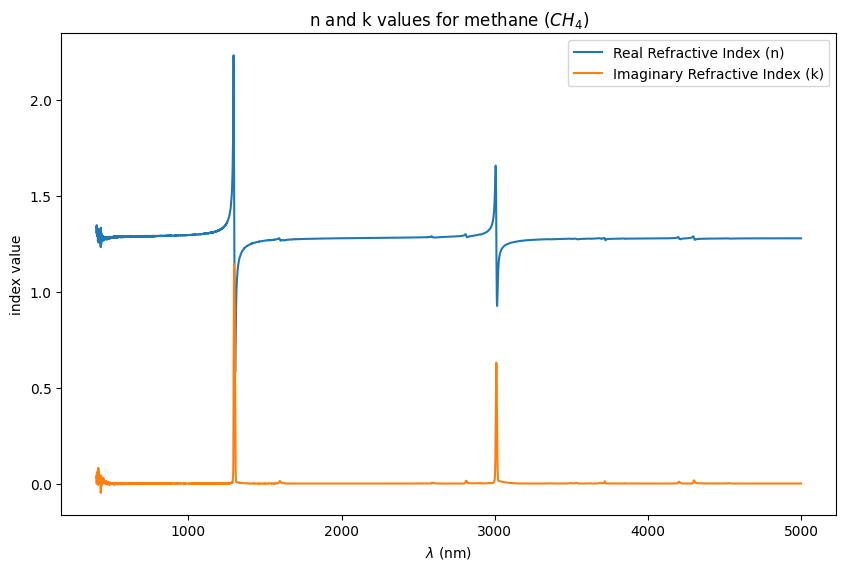

In [46]:
plt.figure(figsize = [10, 10/1.6])
plt.plot(wavelength, n_arr, label = 'Real Refractive Index (n)')
plt.plot(wavelength, k_arr, label = 'Imaginary Refractive Index (k)')
plt.xlabel('$\lambda$ (nm)')
plt.ylabel('index value')
plt.title('n and k values for methane ($CH_{4}$)')
plt.legend()

## Mie Parameter Calculations

In [107]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [118]:
diameter_ch4 = [1000, 10000, 100000] #nm
m_arr = n_arr[0:29999] + 1j*k_arr[0:29999]
mie_params_1 = []
mie_params_10 = []
mie_params_100 = []
i = 0
while i < len(m_arr):
#for i in range(len(m_arr)):
    Qext_1,Qsca_1,Qabs_1,g_1,Qpr,Qback,Qratio= ps.AutoMieQ(m_arr[i],wavelength[i],diameter_ch4[0])
    mie_params_1.append([Qext_1,Qsca_1,Qabs_1,g_1])

    Qext_10,Qsca_10,Qabs_10,g_10,Qpr,Qback,Qratio= ps.AutoMieQ(m_arr[i],wavelength[i],diameter_ch4[1])
    mie_params_10.append([Qext_10,Qsca_10,Qabs_10,g_10])

    Qext_100,Qsca_100,Qabs_100,g_100,Qpr,Qback,Qratio= ps.AutoMieQ(m_arr[i],wavelength[i],diameter_ch4[2])
    mie_params_100.append([Qext_100,Qsca_100,Qabs_100,g_100])

    i+=1

In [119]:
Qext_1_arr = column(mie_params_1,0)
Qsca_1_arr = column(mie_params_1,1)
Qabs_1_arr = column(mie_params_1,2)
g_1_arr = column(mie_params_1,3)

Qext_10_arr = column(mie_params_10,0)
Qsca_10_arr = column(mie_params_10,1)
Qabs_10_arr = column(mie_params_10,2)
g_10_arr = column(mie_params_10,3)

Qext_100_arr = column(mie_params_100,0)
Qsca_100_arr = column(mie_params_100,1)
Qabs_100_arr = column(mie_params_100,2)
g_100_arr = column(mie_params_100,3)

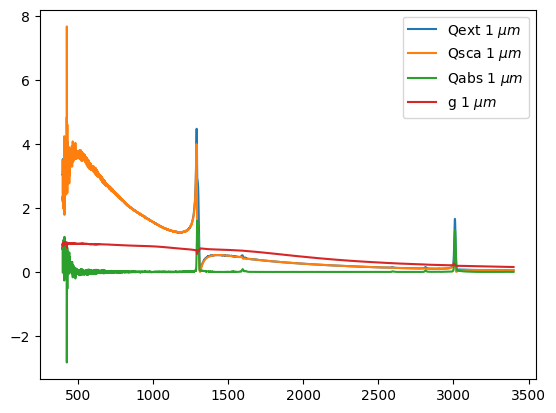

In [120]:
plt.plot(wavelength[0:29999], Qext_1_arr, label = 'Qext 1 $\mu m$')
plt.plot(wavelength[0:29999], Qsca_1_arr, label = 'Qsca 1 $\mu m$')
plt.plot(wavelength[0:29999], Qabs_1_arr, label = 'Qabs 1 $\mu m$')
plt.plot(wavelength[0:29999], g_1_arr, label = 'g 1 $\mu m$')
plt.legend()

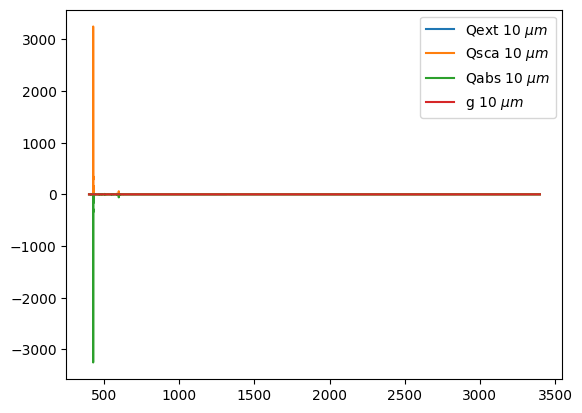

In [121]:
plt.plot(wavelength[0:29999], Qext_10_arr, label = 'Qext 10 $\mu m$')
plt.plot(wavelength[0:29999], Qsca_10_arr, label = 'Qsca 10 $\mu m$')
plt.plot(wavelength[0:29999], Qabs_10_arr, label = 'Qabs 10 $\mu m$')
plt.plot(wavelength[0:29999], g_10_arr, label = 'g 10 $\mu m$')
plt.legend()

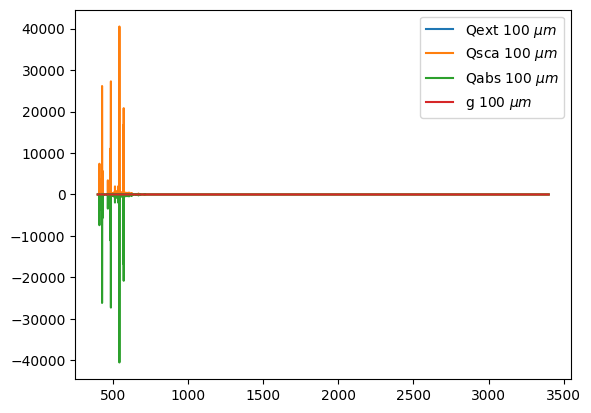

In [122]:
plt.plot(wavelength[0:29999], Qext_100_arr, label = 'Qext 100 $\mu m$')
plt.plot(wavelength[0:29999], Qsca_100_arr, label = 'Qsca 100 $\mu m$')
plt.plot(wavelength[0:29999], Qabs_100_arr, label = 'Qabs 100 $\mu m$')
plt.plot(wavelength[0:29999], g_100_arr, label = 'g 100 $\mu m$')
plt.legend()